In [38]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import subprocess


In [39]:
cmd = "./comp-phys-lb-c"

p = subprocess.Popen(cmd,
                     stdout=subprocess.PIPE,
                     stderr=subprocess.STDOUT)

for line in iter(p.stdout.readline, b''):
    print(">>> " + line.decode("utf-8").rstrip())

>>> Simulation progress: 0%
>>> Simulation progress: 10%
>>> Simulation progress: 20%
>>> Simulation progress: 30%
>>> Simulation progress: 40%
>>> Simulation progress: 50%
>>> Simulation progress: 60%
>>> Simulation progress: 70%
>>> Simulation progress: 80%
>>> Simulation progress: 90%
>>> Finished in 12.975 s


In [40]:
data = np.load("out.npz")

u = data["u"]
rho = data["rho"]
lattice = data["lattice"]
N_x = data["N_x"][0]
N_y = data["N_y"][0]
link_list = data["link_list"]
l_id = data["lattice_identities"];



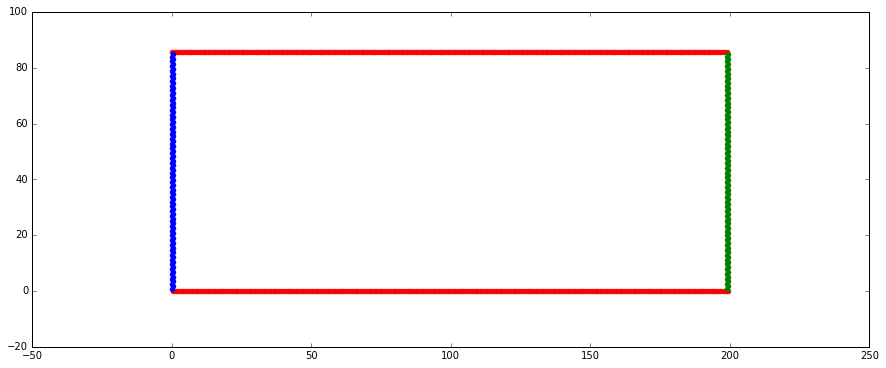

In [47]:
interior = l_id == 0
noslip = l_id == 1
inflow = l_id == 2
outflow = l_id == 4

plt.figure(figsize=(15,15))
#plt.scatter(lattice[interior,0], lattice[interior,1], color='k')
plt.scatter(lattice[noslip,0], lattice[noslip,1], color='r')
plt.scatter(lattice[inflow,0], lattice[inflow,1], color='b')
plt.scatter(lattice[outflow,0], lattice[outflow,1], color='g')
plt.gca().set_aspect('equal')

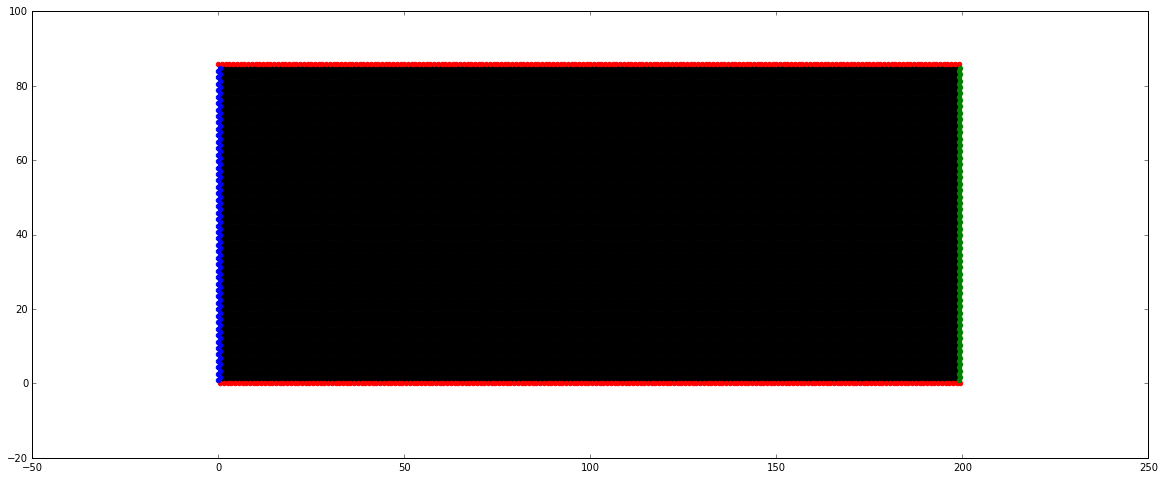

In [42]:
interior = (l_id == 0)
noslip = (l_id == 1)
inflow = (l_id == 2)
outflow = (l_id == 4)

plt.figure(figsize=(20,20))


plt.scatter(lattice[interior,0], lattice[interior,1], color='k')
plt.scatter(lattice[noslip,0], lattice[noslip,1], color='r')
plt.scatter(lattice[inflow,0], lattice[inflow,1], color='b')
plt.scatter(lattice[outflow,0], lattice[outflow,1], color='g')
plt.gca().set_aspect('equal')

plt.show()

In [43]:
# debugging code to plot the links between grid points in direction 'direc'
# this code is very slow for large grid sizes

plot_links = False

if plot_links:
    direc = 6
    plt.figure()
    for i in range(N_x * N_y):
        if(link_list[i,direc] != -1 and link_list[i,direc] < N_x * N_y and link_list[i,direc] >= 0):
            x1 = lattice[i,0]
            y1 = lattice[i,1]

            x2 = lattice[link_list[i,direc],0]
            y2 = lattice[link_list[i,direc],1]

            plt.arrow(x1, y1, (x2-x1)/2, (y2-y1)/2, head_width=0.2, head_length=0.2)

    plt.scatter(lattice[:,0], lattice[:,1])
    plt.show()

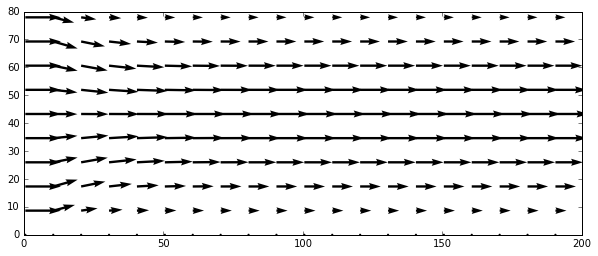

In [44]:
plt.figure(figsize=(10, 10))
sp = 10

lattice_grid = lattice.reshape(N_x,N_y,2)
u_grid = u.reshape(N_x,N_y,2)

plt.quiver(lattice_grid[::sp,::sp,0], lattice_grid[::sp,::sp,1], u_grid[::sp,::sp,0], u_grid[::sp,::sp,1])
plt.gca().set_aspect('equal')

plt.show()

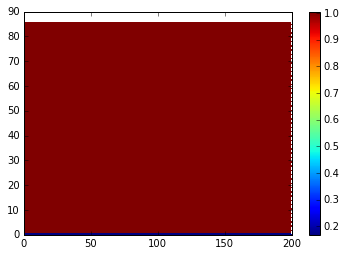

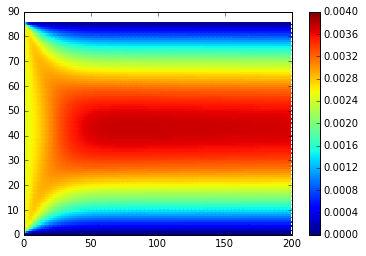

In [45]:
# plot results: density and magnitude of the velocity

plt.pcolor(lattice_grid[:,:,0], lattice_grid[:,:,1], rho.reshape(N_x, N_y))
plt.colorbar()

plt.show()

plt.figure()
plt.pcolor(lattice_grid[:,:,0], lattice_grid[:,:,1], np.linalg.norm(u_grid, axis=2))
plt.colorbar()
plt.show()

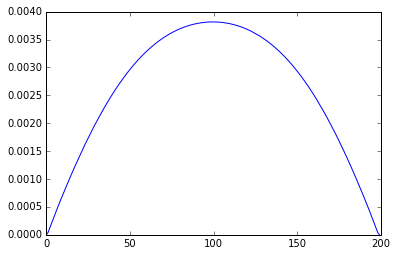

In [8]:
# plot results: x-velocity cross-sectional profile
line = 100

plt.plot(u_grid[line,:,0])